# Other Regression Models

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Import the cleaned dataset with no outliers and encoded
df = pd.read_csv('CO2 Emissions_Canada_cleaned_removed_outliers_encoded.csv')
df.drop(df.columns[0], axis=1, inplace=True)

print("Data type : ", type(df))
print("Data dims : ", df.shape)

df.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (5965, 31)


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Number of Gears,Vehicle Class_COMPACT,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,...,Transmission_A,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,8.5,196,5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,9.6,221,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,5.9,136,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,11.1,255,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,10.6,244,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
print(df.dtypes)

Engine Size(L)                            float64
Cylinders                                   int64
Fuel Consumption Comb (L/100 km)          float64
CO2 Emissions(g/km)                         int64
Number of Gears                             int64
Vehicle Class_COMPACT                     float64
Vehicle Class_FULL-SIZE                   float64
Vehicle Class_MID-SIZE                    float64
Vehicle Class_MINICOMPACT                 float64
Vehicle Class_MINIVAN                     float64
Vehicle Class_PICKUP TRUCK - SMALL        float64
Vehicle Class_PICKUP TRUCK - STANDARD     float64
Vehicle Class_SPECIAL PURPOSE VEHICLE     float64
Vehicle Class_STATION WAGON - MID-SIZE    float64
Vehicle Class_STATION WAGON - SMALL       float64
Vehicle Class_SUBCOMPACT                  float64
Vehicle Class_SUV - SMALL                 float64
Vehicle Class_SUV - STANDARD              float64
Vehicle Class_TWO-SEATER                  float64
Vehicle Class_VAN - CARGO                 float64


## Multi-Variate Random Forests for Regression
Using the same encoded dataset, we will employ Random Forests for Regression.

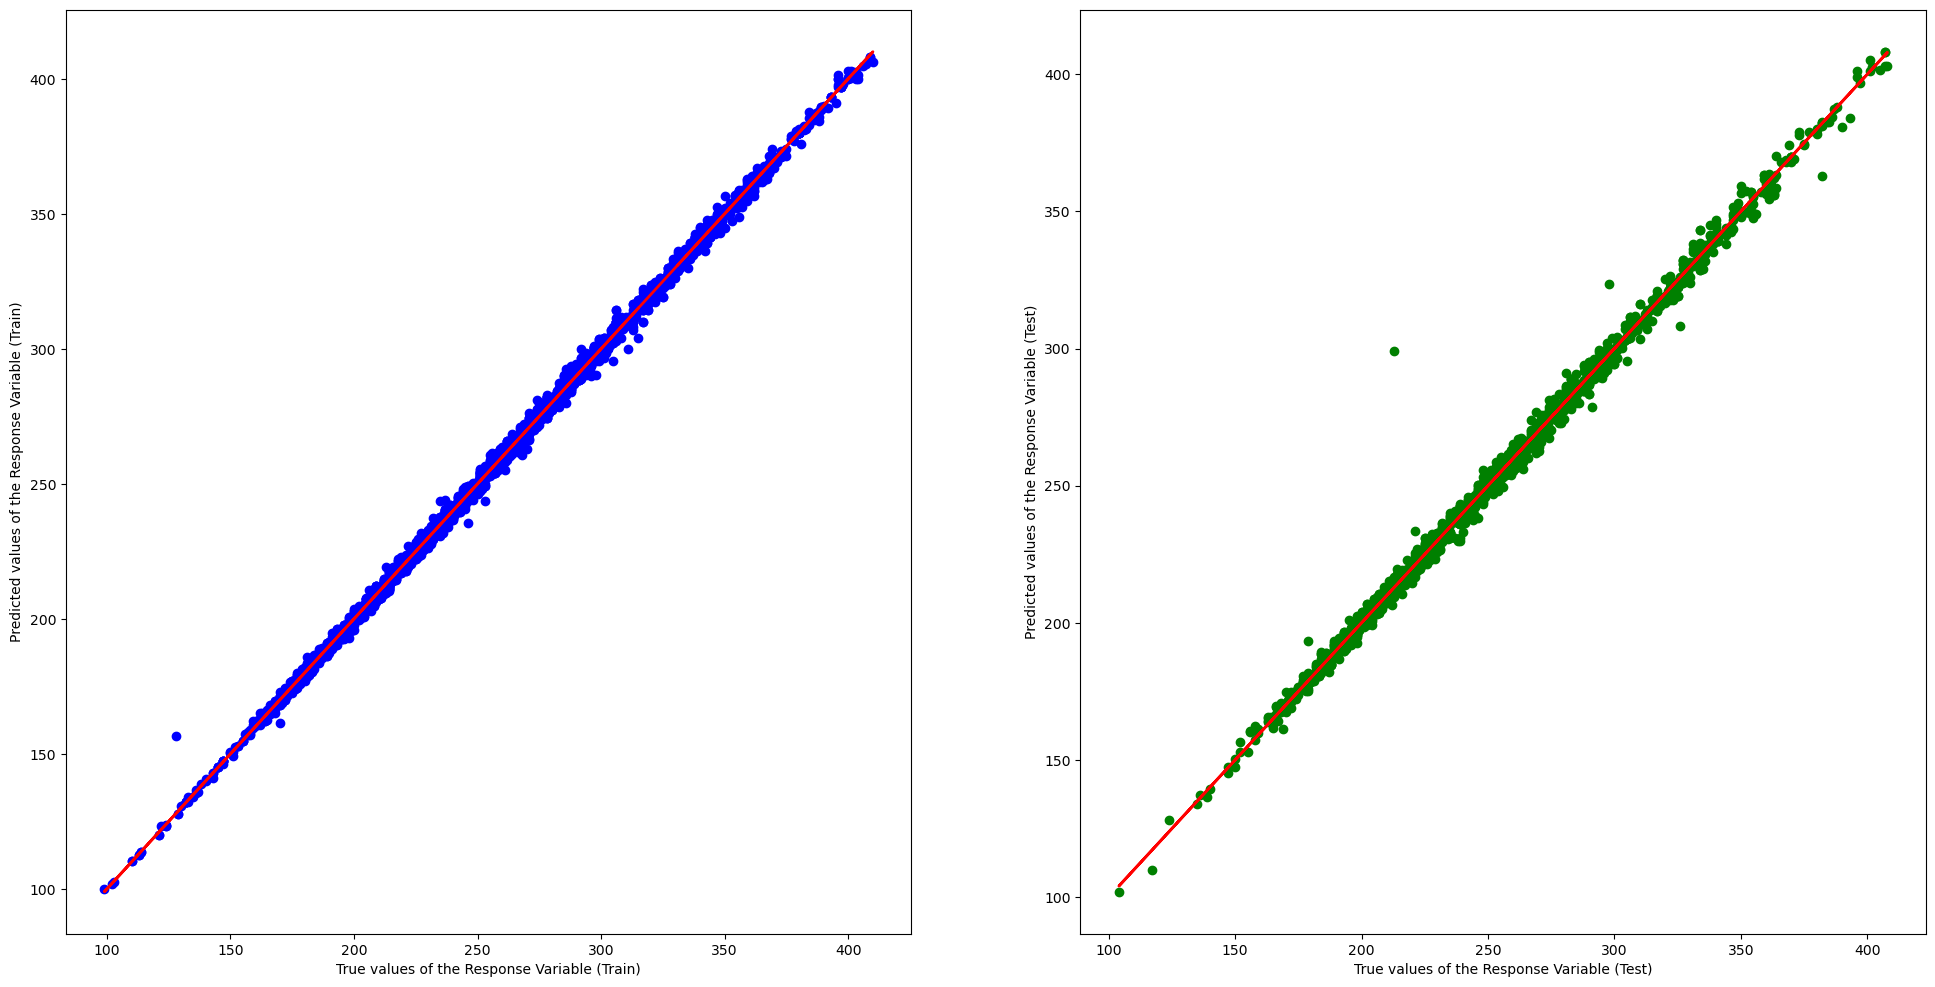

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.999068386072298
Mean Squared Error (MSE) 	: 2.740951368739365
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9954090538280995
Mean Squared Error (MSE) 	: 13.387036383024242


In [4]:
# Import important functions
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

#RandomForestRegression
regress = RandomForestRegressor()
regress.fit(X_train, y_train)

#Plot
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

### Hyperparameter Tuning

In [5]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.arange(50,501,50),   # number of trees 50, 100, ..., 500
              'max_depth': np.arange(2, 11)           # depth of trees 2, 3, 4, 5, ..., 10
}

grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid, 
                           cv=5,
                          scoring ="neg_mean_squared_error")

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 9, 'n_estimators': 300}
-10.23837989166945


### Use the Best Model found through GridSearchCV

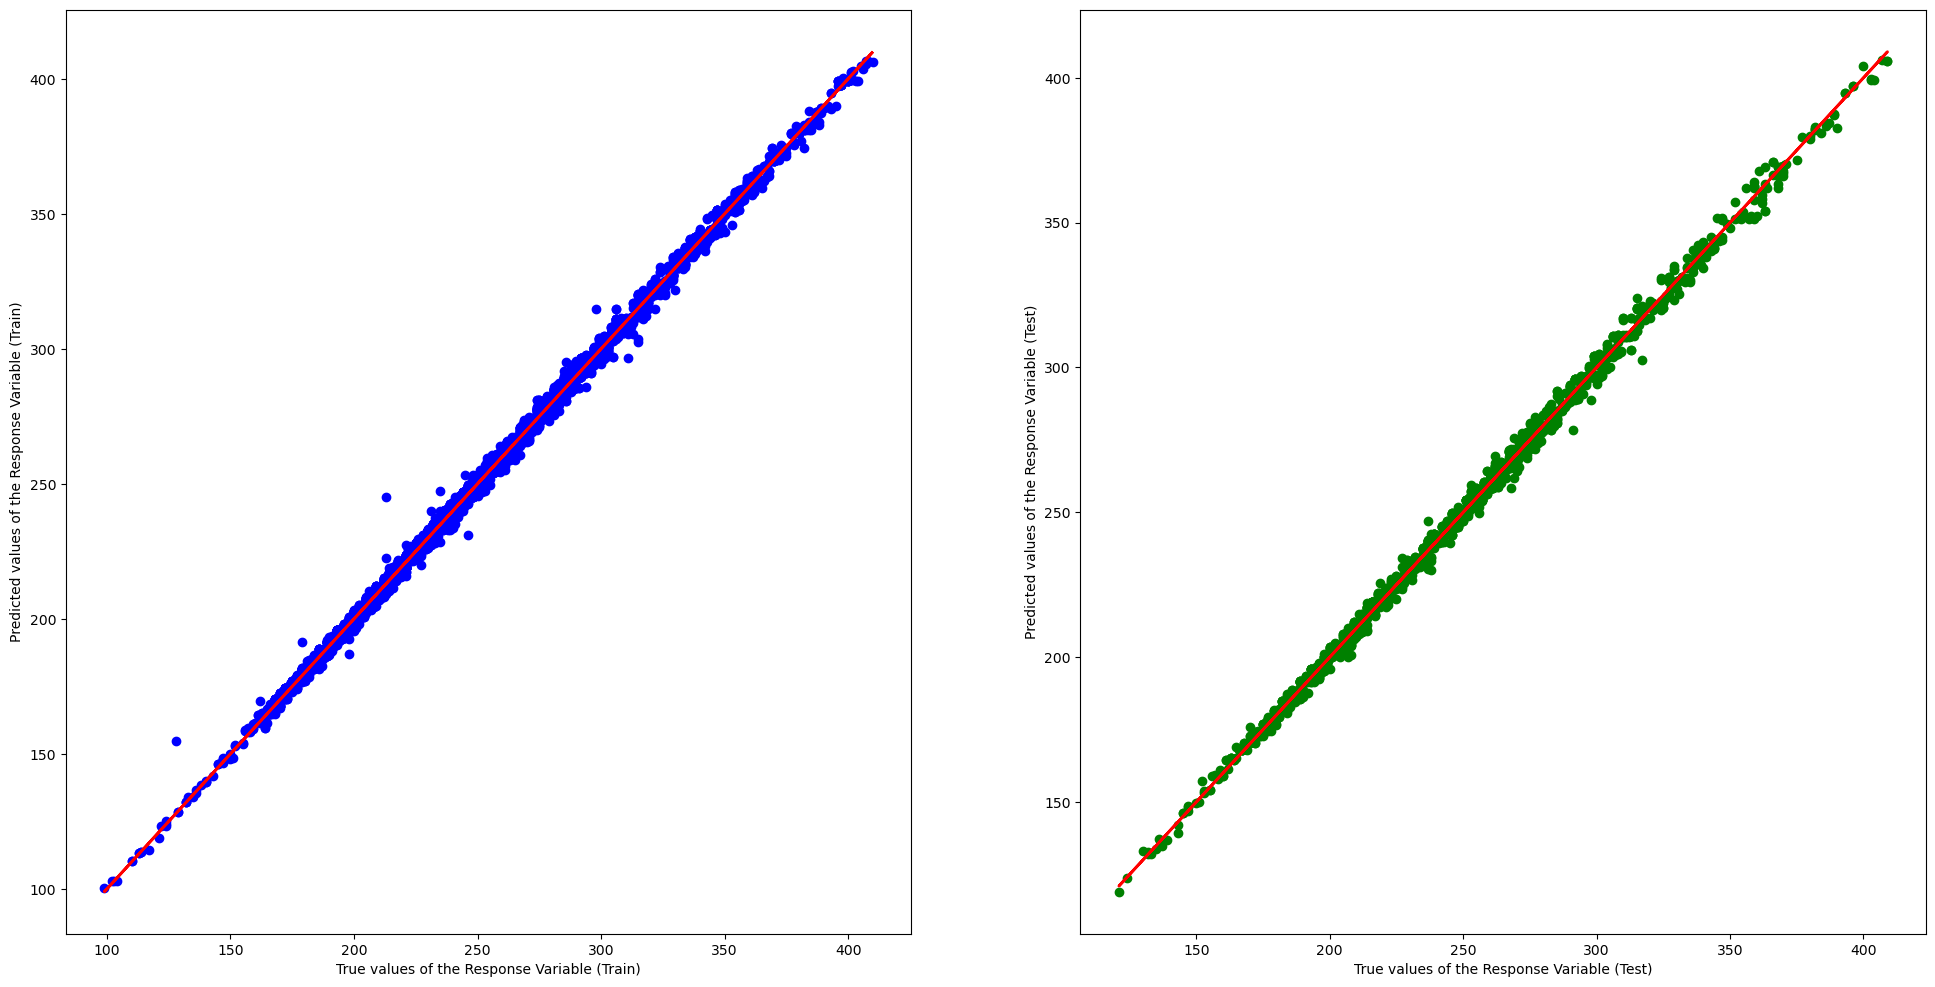

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9981048714976442
Mean Squared Error (MSE) 	: 5.545875153345805
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9976582426479328
Mean Squared Error (MSE) 	: 6.944728543179116


In [8]:
# Import important functions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

#RandomForestRegression
regress = RandomForestRegressor(n_estimators = 300,  # n_estimators denote number of trees
                                 max_depth = 9)       # set the maximum depth of each tree
regress.fit(X_train, y_train)

#Plot
y_train_pred = regress.predict(X_train)
y_test_pred = regress.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regress.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

## Multi-Variate K-Nearest Neighbors Regression
Using the same encoded dataset, we will employ  K-Nearest Neighbors Regression.

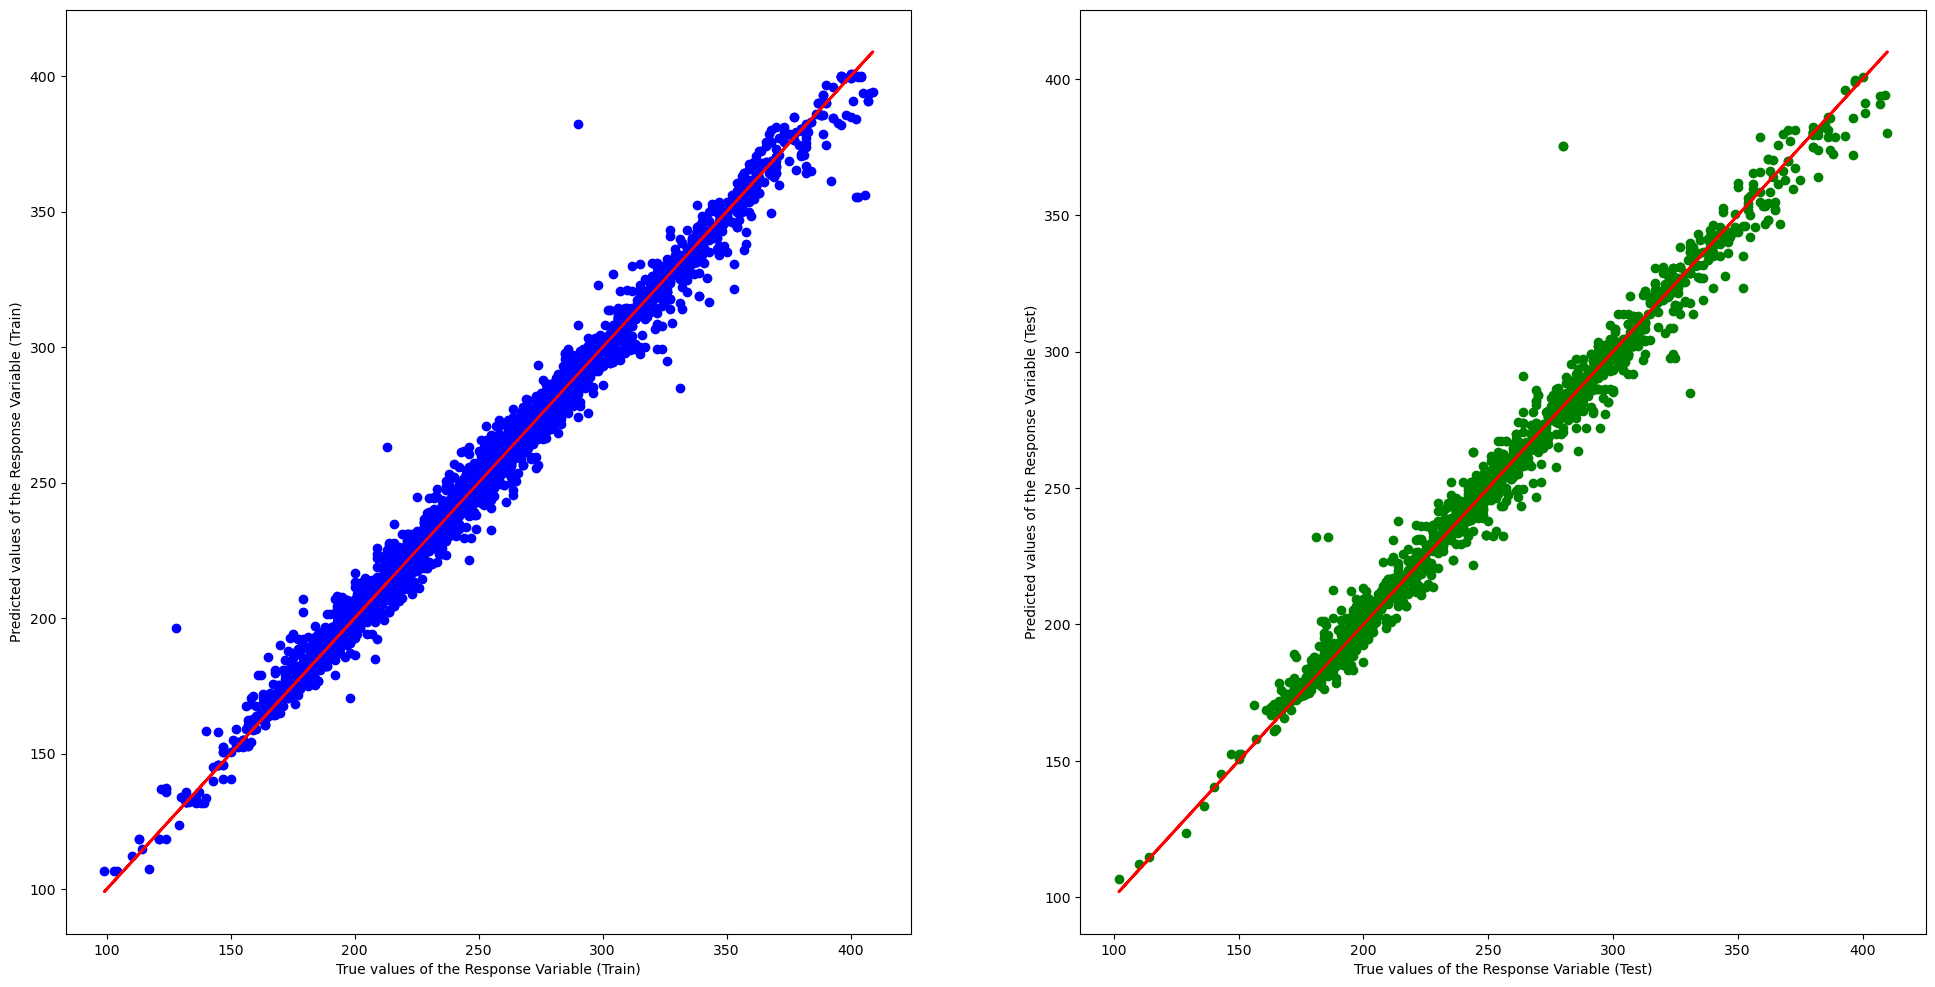

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9895818055216384
Mean Squared Error (MSE) 	: 30.09708025933378
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9810772132432355
Mean Squared Error (MSE) 	: 58.21436997319034


In [9]:
# Import important functions
from sklearn.neighbors import KNeighborsRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

#Plot
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

### Hyperparameter Tuning

In [10]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

#parameter grid for KNN
param_grid = {
    'n_neighbors':[2,3,5,7,8,11],
    'leaf_size': [10, 20, 30], 
    'metric': ['euclidean', 'manhattan']  
}

# initialize gridsearchcv object for KNN
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, scoring ="neg_mean_squared_error")

grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

KNeighborsRegressor(leaf_size=10, metric='euclidean', n_neighbors=2)
-44.5137583267719


### Use the Best Model found through GridSearchCV

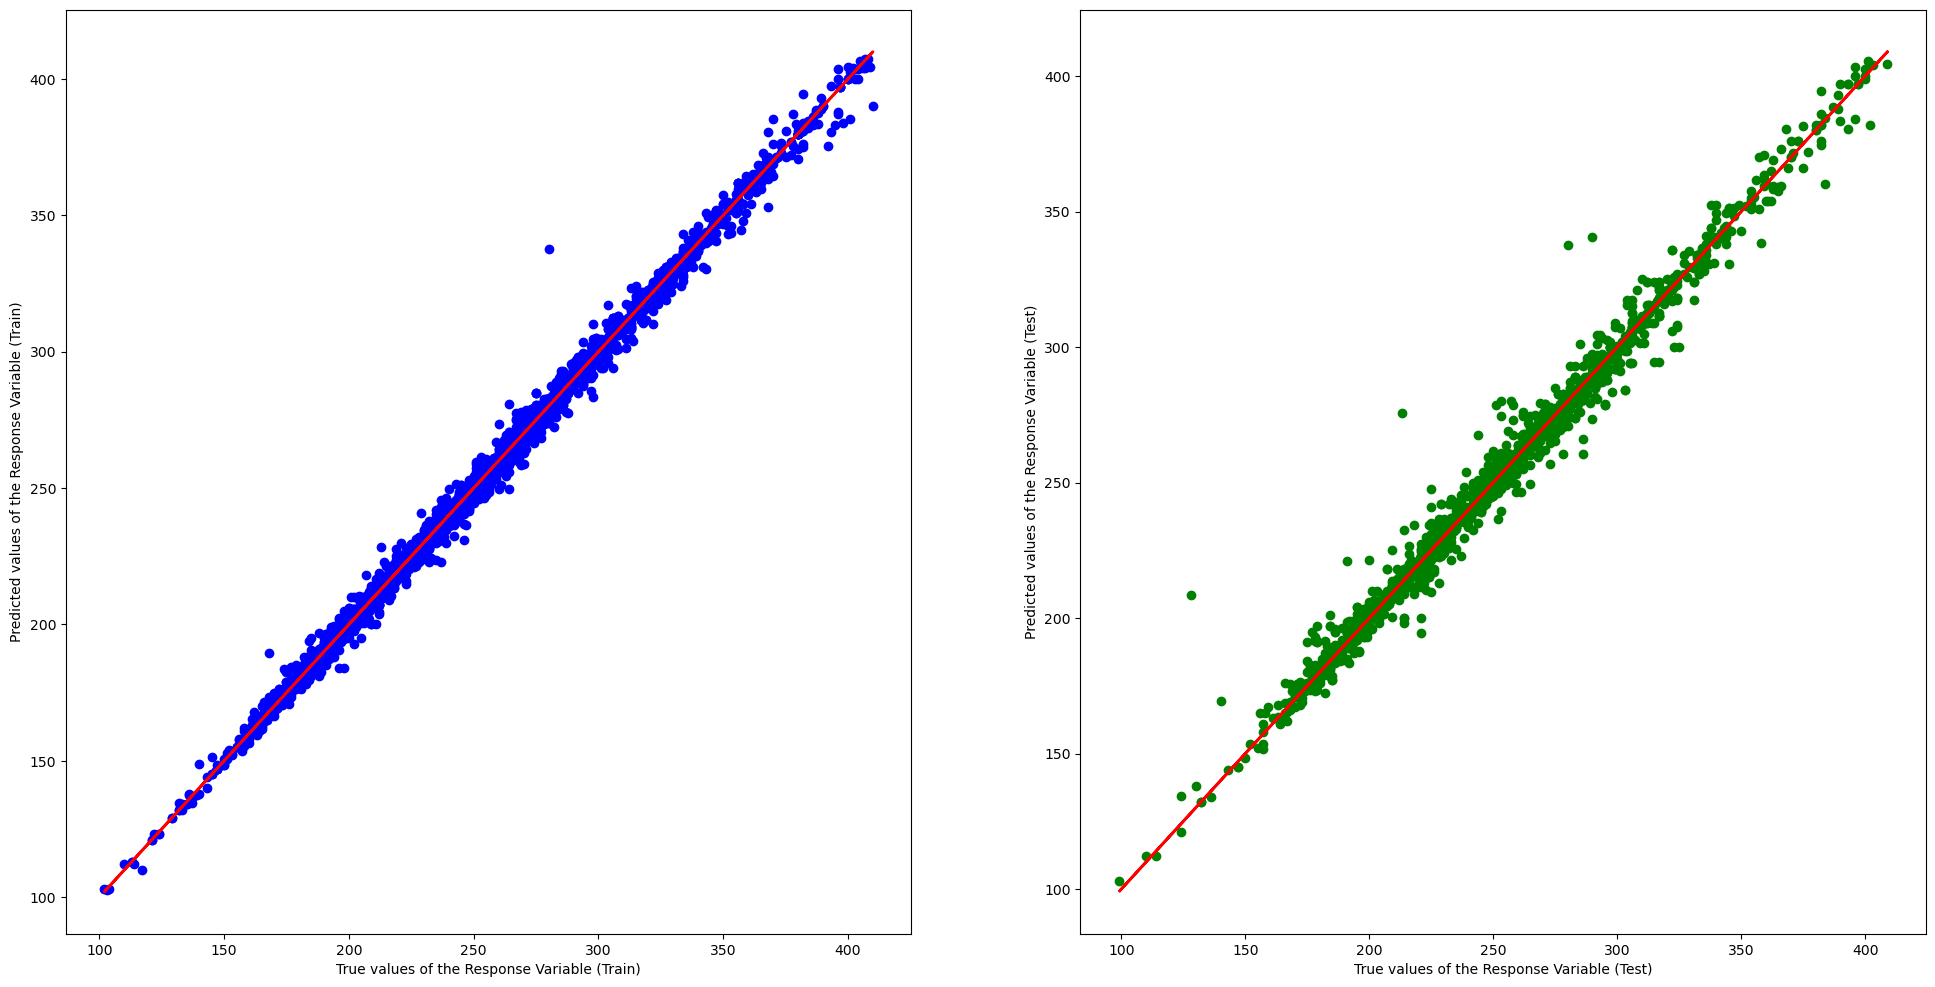

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9971261550086062
Mean Squared Error (MSE) 	: 8.490554437737536
Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9850830489449732
Mean Squared Error (MSE) 	: 43.01172922252011


In [14]:
# Import important functions
from sklearn.neighbors import KNeighborsRegressor

# Extract Response and Predictors
X = df.drop(columns=['CO2 Emissions(g/km)'])
Y = df['CO2 Emissions(g/km)']

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = 2, leaf_size = 10, metric = 'euclidean')

knn.fit(X_train, y_train)

#Plot
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


#Goodness of fit 
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", knn.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

## Evaluating the 3 Regression Models

**Linear Regression**  
Train Dataset  
Explained Variance (R^2): 0.991468041344051  
Mean Squared Error (MSE): 25.14448209690243 

Test Dataset  
Explained Variance (R^2): 0.9912650394480036  
Mean Squared Error (MSE): 25.37751768606318 

**Random Forest for Regression**  
Train Dataset  
Explained Variance (R^2): 0.9981048714976442  
Mean Squared Error (MSE): 5.545875153345805  

Test Dataset   
Explained Variance (R^2): 0.9981048714976442  
Mean Squared Error (MSE): 6.944728543179116  

**K-Nearest Neighbors Regression**  
Train Dataset    
Explained Variance (R^2): 0.9971261550086062  
Mean Squared Error (MSE): 8.490554437737536   

Test Dataset  
Explained Variance (R^2): 0.9850830489449732   
Mean Squared Error (MSE): 43.01172922252011  

**Comparing the Explained Variance (R^2) of the train datasets**  
All 3 models have relatively similar R^2 of 0.99 which shows that the models almost fits perfectly. Random Forest for Regression Model has the highest R^2 which suggests that it is the closest to fitting perfectly.

**Comparing the Mean Squared Error (MSE) of the test datasets**  
Random Forest for Regression has the lowest MSE, which suggests that it has the highest prediction accuracy. On the other hand, MSE of K-Nearest Neighbors Regression is the greatest and the test MSE is much higher compared to the train MSE, which suggests that the model might be overfitting to some extent.

**Which model would be the best to predict it?**  
Random Forest for Regression Model is the best model to predict CO2 Emissions as it is the best fit and highest prediction acurracy.